In [2]:
import pandas as pd

# Load the dataset
discount_campaign_df = pd.read_csv(r'D:\SQL\SQL Bunch internshala task\discount_campaign.csv')

# Inspect the data
print(discount_campaign_df.head())
print(discount_campaign_df.info())


   customer_id discount_applied  order_count_before  order_count_after  \
0         1286               No                   4                 11   
1         1563              Yes                  10                  2   
2         1289               No                   2                  8   
3         1053               No                   4                  3   
4         1516              Yes                  19                  2   

   total_spend_before  total_spend_after  
0         1736.119038        3601.461583  
1          923.649992         387.822968  
2         3526.359734        9705.813801  
3         1683.084961         326.592907  
4         3746.981815        6747.656727  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         500 non-null    int64  
 1   discount_applied    500 non-null    objec

In [6]:
# Calculate the change in total spend and order count
discount_campaign_df['spend_change'] = discount_campaign_df['total_spend_after'] - discount_campaign_df['total_spend_before']
discount_campaign_df['order_count_change'] = discount_campaign_df['order_count_after'] - discount_campaign_df['order_count_before']

# Summary of changes
print(discount_campaign_df[['customer_id', 'spend_change', 'order_count_change']].head())


   customer_id  spend_change  order_count_change
0         1286   1865.342545                   7
1         1563   -535.827024                  -8
2         1289   6179.454067                   6
3         1053  -1356.492055                  -1
4         1516   3000.674912                 -17


In [8]:
# Segment customers based on spending change
def segment_customer(row):
    if row['spend_change'] > 1000:  # Example threshold for high responders
        return 'High Responder'
    elif row['spend_change'] > 0:
        return 'Medium Responder'
    else:
        return 'Low Responder'

discount_campaign_df['response_segment'] = discount_campaign_df.apply(segment_customer, axis=1)

# Check the segmentation results
print(discount_campaign_df['response_segment'].value_counts())


response_segment
High Responder      336
Low Responder       104
Medium Responder     60
Name: count, dtype: int64


In [10]:
# Assuming the 'profit_margin' is not provided, we calculate a simple profitability change based on spending increase
discount_campaign_df['profitability_change'] = discount_campaign_df['spend_change']

# Check the profitability analysis
print(discount_campaign_df[['customer_id', 'profitability_change']].head())


   customer_id  profitability_change
0         1286           1865.342545
1         1563           -535.827024
2         1289           6179.454067
3         1053          -1356.492055
4         1516           3000.674912


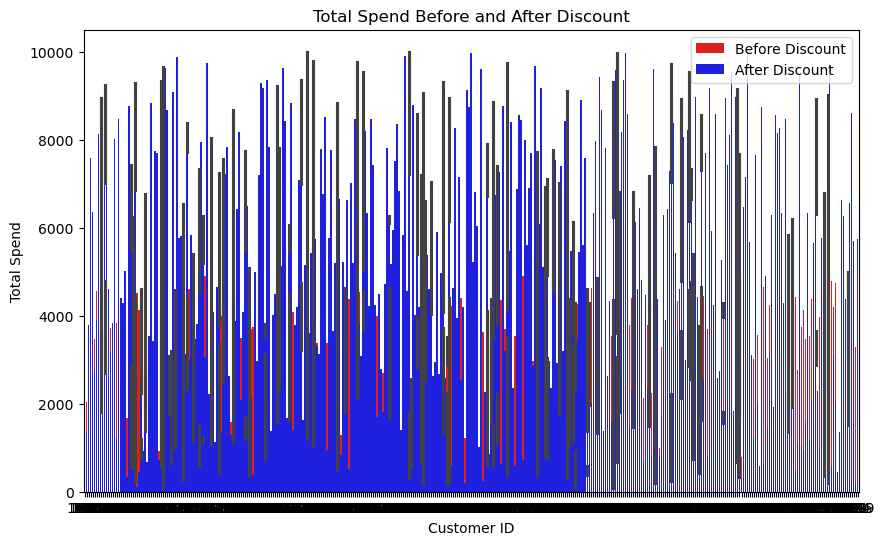

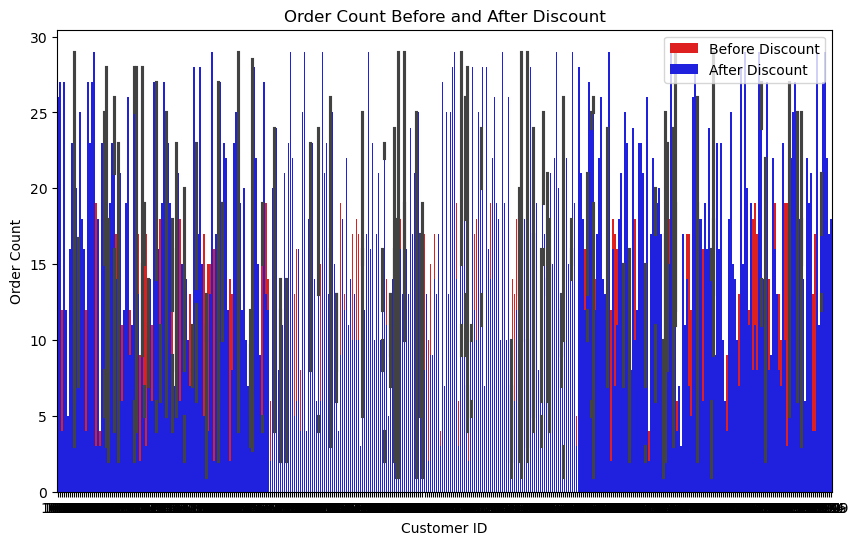

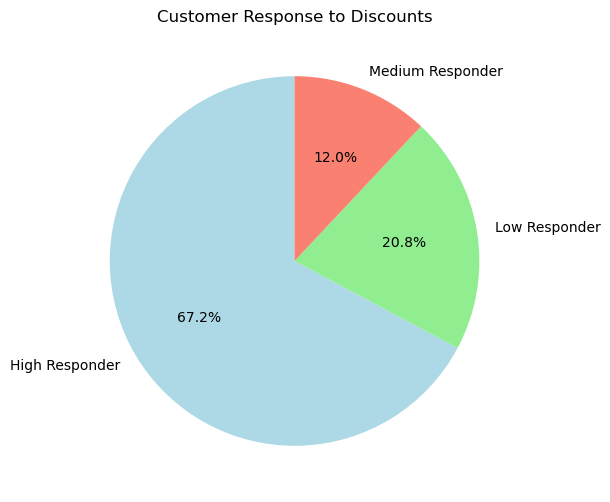

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for total spend before vs. after discount
plt.figure(figsize=(10, 6))
sns.barplot(data=discount_campaign_df, x='customer_id', y='total_spend_before', color='red', label='Before Discount')
sns.barplot(data=discount_campaign_df, x='customer_id', y='total_spend_after', color='blue', label='After Discount')
plt.title('Total Spend Before and After Discount')
plt.xlabel('Customer ID')
plt.ylabel('Total Spend')
plt.legend()
plt.show()

# Bar plot for order count before vs. after discount
plt.figure(figsize=(10, 6))
sns.barplot(data=discount_campaign_df, x='customer_id', y='order_count_before', color='red', label='Before Discount')
sns.barplot(data=discount_campaign_df, x='customer_id', y='order_count_after', color='blue', label='After Discount')
plt.title('Order Count Before and After Discount')
plt.xlabel('Customer ID')
plt.ylabel('Order Count')
plt.legend()
plt.show()

# Pie chart for customer response segmentation
response_counts = discount_campaign_df['response_segment'].value_counts()
plt.figure(figsize=(8, 6))
response_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'salmon'])
plt.title('Customer Response to Discounts')
plt.ylabel('')
plt.show()


Business Insights and Strategy Recommendations:

To maximize revenue while maintaining profitability, a data-driven discount strategy should be designed to target the right customers, offer appropriate discount levels, and focus on increasing both customer retention and order frequency. Below are several recommended strategies based on the Discount Impact Analysis:

1. Target High-Value Customers (High Responders)
Strategy: Offer larger discounts or exclusive offers to customers who are responsive to discounts and show significant increases in spending (high responders). These customers have a higher lifetime value and are more likely to increase their spending when incentivized.
Action: Implement tiered discounting based on customer spend levels. For example:
Customers who spend more than $1000 in a given period could receive a 20% discount.
Customers who spend less could receive a smaller discount, like 10%.
Benefit: High-value customers already have a strong purchasing behavior. Offering them a personalized discount can boost loyalty and increase order volume.

2. Personalized Discounts for Medium-Value Customers (Medium Responders)
Strategy: For medium responders, discounts should be moderate to maintain engagement. These customers show some responsiveness to discounts but don't always significantly increase their orders. Personalizing discounts based on customer interests (e.g., related products or categories) can drive more purchases.
Action: Provide targeted promotions:
Use customer purchase history to identify products or categories they frequently buy and offer a discount on those items.
Offer discounts on complementary or related products to encourage bundle purchases.
Benefit: Personalized offers make customers feel valued and increase the likelihood of a purchase. By offering discounts on products they are already interested in, you increase the chance of conversion without impacting margins too much.


3. Leverage Discounts for Customer Retention (Low Responders)
Strategy: For low responders, focus on small, frequent discounts to retain them over the long term. Offering frequent, smaller discounts might encourage customers to make more purchases while maintaining profitability.
Action:
Implement loyalty programs where customers earn rewards (e.g., discounts or points) based on their purchase frequency.
Offer discounts on specific items based on stock levels or seasonal trends.
Benefit: Low responders are unlikely to increase their spending significantly from a one-time large discount. Instead, smaller, consistent incentives will encourage them to return, increasing overall sales.


4. Implement Time-Sensitive Discounts (Urgency)
Strategy: Time-sensitive discounts create a sense of urgency, which can drive sales during off-peak periods or clear out excess inventory without severely impacting profitability.
Action:
Offer discounts that are valid only for short windows (e.g., flash sales or seasonal promotions).
Use limited-time bundles to incentivize higher-order volume without significant margin loss.
Benefit: Time-limited promotions drive urgency and increase conversions. Since customers are motivated by urgency, the response rates may be higher even with smaller discount percentages.


5. Dynamic Pricing and Discounting
Strategy: Use dynamic pricing strategies to offer discounts based on factors like demand, customer behavior, and purchase history. This ensures discounts are given only when they are likely to be effective, avoiding blanket discounting.
Action:
Use data to determine when to offer discounts (e.g., based on time of the week, customer behavior, or market trends).
Apply predictive analytics to identify customers who are more likely to respond to discounts.
Benefit: Dynamic pricing ensures that discounts are not overused, thus preserving profit margins. By targeting the right customers and the right time, discounts can drive more sales without affecting profitability.


6. Evaluate and Optimize Discount Strategies Continuously
Strategy: Continuously evaluate the effectiveness of discount strategies and optimize based on performance metrics (e.g., sales growth, customer acquisition, and profitability).
Action:
Use A/B testing to evaluate which discount strategies work best for different customer segments.
Regularly track key metrics like customer retention, average order value (AOV), and profit margins to determine the ROI of discount campaigns.
Benefit: Ongoing analysis helps optimize discount campaigns, ensuring they are yielding the desired results. Regular monitoring prevents overspending on discounts and maintains profitability over time.